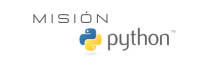

# Relaciones en la POO

En el mundo de la Programación Orientada a Objetos tenemos diferentes tipos de relaciones en las que cada una tiene un significado semántico y una consecuencia en código.  Veremos cómo implementar cada una de ellas en Python.

## Herencia

Le permite a una clase (subclase) heredar las características y el comportamiento de otra clase (superclase).

Sintaxis:



```
class Subclase (Superclase):
```
Ejemplo:

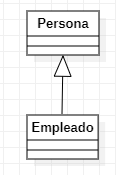

In [ ]:
class Persona:   #esta es la superclase

  def __init__(self, nombre, edad):  #constructor de la superclase
    self.__nombre = nombre
    self.__edad = edad

  def cumplir_anos(self):
    self.__edad += 1

  def devolver_nombre(self):
    return self.__nombre

  def devolver_edad(self):
    return self.__edad
######################################################################
class Empleado(Persona):  #esta es la subclase Empleado que hereda de Persona
  pass

###########################################
emp = Empleado ("Juan", 30)  #se crea un empleado (subclase)
emp.cumplir_anos() #se llama al método heredado de la superclase
emp.salario = 1_500_000
print (f"nombre del empleado: {emp.devolver_nombre()}")
print (f"edad del empleado: {emp.devolver_edad()}")
print (f"salario del empleado: {emp.salario}")



### super()

**La función super()** permite acceder a los miembros de la superclase, entre ellos su constructor.

In [ ]:
class Persona:

  def __init__(self, nombre, edad):  #constructor de la superclase
    self.__nombre = nombre
    self.__edad = edad

  def cumplir_anos(self):
    self.__edad += 1

  def devolver_nombre(self):
    return self.__nombre

  def devolver_edad(self):
    return self.__edad

class Empleado(Persona):
  def __init__(self, nombre, edad, salario): #constructor de la subclase
    super().__init__(nombre, edad)  #envía el nombre y edad al constructor de la superclase
    self.__salario = salario

  def devolver_salario(self):
    return self.__salario

###########################################
emp = Empleado ("Juan", 30, 1_500_000)  #se crea un empleado (sublcase)
emp.cumplir_anos()
print (f"nombre del empleado: {emp.devolver_nombre()}")
print (f"edad del empleado: {emp.devolver_edad()}")
print (f"salario del empleado: {emp.devolver_salario()}")


### issubclass()

**issubclass()** es una función que nos permite comprobar si una clase es subclase de otra.  

In [ ]:
print (issubclass(Empleado, Persona))
print (issubclass(Persona, Empleado))

### Herencia múltiple

En Python la herencia múltiple es permitida y se define simplemente enviando varias superclases entre paréntesis al momento de crear una subclase



```
class Subclase (Superclase1, Superclase2, Superclase_n):
    pass
```



her2.png

In [ ]:
class Persona:
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad

class Musico:
    def __init__(self, instrumento, genero):
        self.instrumento = instrumento
        self.genero = genero

    def tocar_instrumento(self):
        print(f"estoy tocando el (la) {self.instrumento}.")


class Estudiante:
    def __init__(self, escuela, promedio):
        self.escuela = escuela
        self.promedio = promedio

class EstudianteMusico(Estudiante, Persona, Musico):
    def __init__(self, nombre, edad, instrumento, genero, escuela, promedio):
        Persona.__init__(self, nombre, edad)
        Musico.__init__(self, instrumento, genero)
        Estudiante.__init__(self, escuela, promedio)

    def estudiar(self):
        print(f"{self.nombre} está estudiando en {self.escuela}.")

    def mostrar_promedio(self):
        print(f"{self.nombre} tiene un promedio de {self.promedio}.")
##########################################################################

est_musico = EstudianteMusico("Juan",28,"guitarra","balada","bellas artes",4.5)
est_musico.tocar_instrumento()
est_musico.estudiar()
est_musico.mostrar_promedio()


Cuando las superclases tienen los mismos métodos ¿cómo hace la subclase para saber cuál de los métodos debe invocar?

In [ ]:
class A:
  def metodo(self):
    print ("Soy el metodo de la clase A")

class B:
  def metodo(self):
    print ("Soy el metodo de la clase B")

class C(B, A):
  def llamada_metodo(self):
     super().metodo()

mi_c = C()
mi_c.llamada_metodo()

## Asociación

Una asociación es una relación semántica entre objetos y se da cuando un objeto conoce a otro objeto y por lo tanto puede acceder a su comportamiento.



### Asociaciones Unidireccionales

Si la asociación es unidireccional, solo el objeto A conoce al objeto B, pero si es bidireccional tanto A como B se conocen.  

En la siguiente asociación entre Persona y Vehiculo, la Persona conoce el Vehiculo y por lo tanto, puede acceder a su comportamiento, mas el Vehiculo no conoce a la Persona

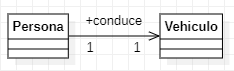

In [ ]:
class Vehiculo:
    def __init__(self, modelo):
        self.modelo = modelo

class Persona:
    def __init__(self, nombre):
        self.nombre = nombre
        self.vehiculo = None

    def comprar_vehiculo(self, vehiculo:Vehiculo):
        self.vehiculo = vehiculo

    def conducir_vehiculo(self):
        if self.vehiculo is not None:
            print(f"{self.nombre} está conduciendo un vehículo {self.vehiculo.modelo}")
        else:
            print(f"{self.nombre} no tiene un vehículo para conducir")
#########################################################################

persona1 = Persona("Juan")
vehiculo1 = Vehiculo("Toyota")
persona1.comprar_vehiculo(vehiculo1)
persona1.conducir_vehiculo()

persona2 = Persona("Pedro")
persona2.conducir_vehiculo()

### Asociaciones Bidireccionales

Si la asociación es bidireccional, el objeto A conoce al objeto B y el objeto B conoce al objeto A.  

En la siguiente asociación entre Persona y Celular, la Persona conoce el Celular asignado y por lo tanto, puede acceder a su comportamiento, además, el Celular conoce a la Persona (propietario).

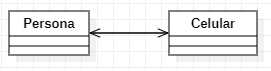

In [ ]:
class Persona:
    def __init__(self, nombre, celular=None):
        self.nombre = nombre
        if celular is not None:
            self.set_celular(celular)

    def set_celular(self, celular):
        self.celular = celular

    def ver_info(self):
        if self.celular is not None:
            return f"{self.nombre} tiene el celular {self.celular.numero}"
        else:
            return f"{self.nombre} no tiene celular"


class Celular:
    def __init__(self, numero):
        self.numero = numero
        self.propietario = None

    def set_propietario(self, propietario:Persona):
        self.propietario = propietario
        self.propietario.set_celular(self)


    def ver_info(self):
        if self.propietario is not None:
            return f"El celular {self.numero} pertenece a {self.propietario.nombre}"
        else:
            return f"El celular {self.numero} no tiene propietario"
#####################################################################
p = Persona ("Juan")
c = Celular (3002350020)

c.set_propietario(p)

print("Informacion de la persona ",p.ver_info())
print("Informacion del celular ",c.ver_info())

## Agregación

Una Agregación es una relación entre dos clases en la que una clase contiene una o varias instancias de otra clase como parte de su estructura. La clase que contiene las instancias de otra clase se llama clase contenedora o clase agregadora, mientras que la clase contenida se llama clase contenida o clase agregada.

En el siguiente ejemplo, una instancia de la clase Persona contiene varios objetos de tipo Celular

agr.png

In [ ]:
class Celular:
    def __init__(self, numero):
        self.numero = numero
    #def __str__(self):
    #  return self.numero

class Persona:
    def __init__(self, nombre):
        self.nombre = nombre
        self.celulares = []

    def agregar_celular(self, celular:Celular):
        self.celulares.append(celular)

    def mostrar_celulares(self):
        print ("celulares de ", self)
        for cel in self.celulares:
          print (cel.numero)

    def quitar_celular(self, num):
      for c in self.celulares:
        if c.numero == num:
          self.celulares.remove(c)

    def __str__(self):
      return self.nombre
#####################################################
p = Persona ("Juan")
c1 = Celular (300248)
c2 = Celular (320789)
c3 = Celular (311445)

p.agregar_celular(c1)
p.agregar_celular(c2)
p.agregar_celular(c3)

p.mostrar_celulares()
p.quitar_celular(320789)
p.mostrar_celulares()

print("numero del cel 2: ", c2.numero)



Nótese que los objetos de tipo Celular existen por fuera de la clase Persona y su existencia no se limita a la existencia de la clase contenedora.

## Composición

En POO, la relación de composición es una relación entre dos clases en la que una clase contiene a otra clase como parte de su estructura y es responsable de crear y destruir las instancias de la clase contenida. La clase contenida no puede existir sin la clase contenedora y está completamente encapsulada dentro de ella.

En el siguiente ejemplo, los objetos de la clase Celular son creados en el constructor de la clase Persona, de esta manera no pueden existir de manera independiente y al eliminar una instancia de la clase Persona, se eliminarán todos los objetos Celular contenidos.



compo1.png

In [ ]:
class Celular:
    def __init__(self, numero):
        self.numero = numero

class Persona:
    def __init__(self, nombre, numero_cel):
        self.nombre = nombre
        self.celular = Celular(numero_cel)

    def ver_info(self):
      print (f"soy {self.nombre} y tengo un celular número {self.celular.numero}")
#################################################################
p = Persona("Juan", 300245)
p.ver_info()
print(c1.numero)

Ahora con varios celulares

In [ ]:
class Celular:
    def __init__(self, numero):
        self.numero = numero

class Persona:
    def __init__(self, nombre):
        self.nombre = nombre
        self.celulares=[]

    def agregar_celular(self, numero):
        self.celulares.append(Celular(numero))

    def mostrar_celulares(self):
        print ("celulares de ", self)
        for cel in self.celulares:
          print (cel.numero)

    def __str__(self):
      return self.nombre


p = Persona ("Pedro")
p.agregar_celular(320865)
p.agregar_celular(300546)
p.agregar_celular(310892)

p.mostrar_celulares()
print ("segundo celular", p.celulares[1].numero)


# Apropiación

1.  A partir del siguiente diagrama:


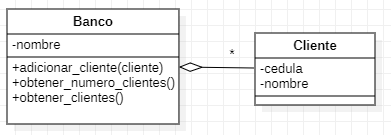

Cree las clases Banco y Cliente para que respondan al diagrama y agregue los elementos adicionales que se requieran

In [ ]:
class Cliente:

  def __init__(self,ced,nom):
    self.__cedula=ced
    self.__nombre=nom
  def getCed(self):
    return self.__cedula
  def getNom(self):
    return self.__nombre
class Banco:
  numclientes=0
  mibanco=None
  def __init__(self,nombre):
    if cls.mibanco is None:
      self.__nombre=nombre
      self.cliente=[]
      self.numclientes=self.numclientes+1
    else:
      raise ValueError("Banco ya existe")

  def Adicionar_cliente(self,cliente:Cliente):
    self.cliente.append(cliente)

  def obtener_numero(self):
    return len(self.cliente)

  def obtener_clientes(self):
    for x in self.cliente:
      print(x.getCed(),x.getNom())
  def ver_inco_cliente(self):
    pass

c1=Cliente(12345,'Uldarico')
b1=Banco("Citibanck")
b1.Adicionar_cliente(c1)
c2=Cliente(67890,'Sandra')
b1.Adicionar_cliente(c2)

print(b1.obtener_numero())
b1.obtener_clientes()

2. A partir del siguiente diagrama:

dia2.png

Realice los ajustes necesarios para que:


*   En la aplicación solo se pueda tener un único Banco, aunque se le puede cambiar su nombre en cualquier momento
*   Se pueda ver la información de todos los clientes del banco incluyendo su cédula, nombre, número de cuenta, tipo y saldo
*   Se pueda ver el total de los saldos en las cuentas de ahorros
*   Se pueda ver el total de los saldos en las cuentas corrientes



In [ ]:
class Cuenta:
    def __init__(self,numero,tipo,saldo):
        self.__numero=self.setNumero(numero)
        self.__tipo=self.setTipo(tipo)
        self.__saldo=self.setSaldo(saldo)
    def getNumero(self):
      return self.__numero
    def getTipo(self):
        return self.__tipo
    def getSaldo(self):
        return self.__saldo
    def setNumero(self,valor):
      self.__numero=valor
    def setTipo(self,valor):
      if valor>2 or valor<1:
        raise ValueError("Tipo de cuenta no valido 1=Ahorros 2=Corriente")
    def setSaldo(self,valor):
      if valor<0:
        raise ValueError("El saldo debe ser mayor o igual que cero")
class Cliente:
  def __init__(self,ced,nom,numerocta,tipo,saldo):
    self.__cedula=ced
    self.__nombre=nom
    self.cuenta=Cuenta(numerocta,tipo,saldo)
  def getCed(self):
    return self.__cedula
  def getNom(self):
    return self.__nombre
  def getNum(self):
    return self.cuenta.getNumero()
  def getTipo(self):
    return self.cuenta.getTipo()
  def getSaldo(self):
    return self.cuenta.getSaldo()

class Banco:
  numclientes=0
  numero_bancos=None
  def __init__(self,nombre):
    if Banco.numero_bancos == None:
      self.__nombre=nombre
      self.cliente=[]
      Banco.numero_bancos=1
    else:
      print("No puede crear mas banco")
      self.numclientes=self.numclientes+1

  def Adicionar_cliente(self,cliente:Cliente):
    self.cliente.append(cliente)
  def getNom(self):
      return self.__nombre
  def obtener_numero(self):
    return len(self.cliente)

  def obtener_clientes(self):
    for x in self.cliente:
      print(self.getNom(),x.getCed(),x.getNom(),x.getNum(),x.getTipo(),x.getSaldo())
  def ver_info_clientes(self):
    pass
  def total_saldos_ahorro(self):
        self.saldoAhorros=0
        for x in self.cliente:
            if x.getTipo()==1:
                self.saldoAhorros=self.saldoAhorros+x.getSaldo()
        return self.saldoAhorros
  def total_saldos_corriente(self):
        pass
  def total_saldos_corriente(self):
        self.saldoAhorros=0
        for x in self.cliente:
            if x.getTipo()==2:
                self.saldoAhorros=self.saldoAhorros+x.getSaldo()
        return self.saldoAhorros
c1=Cliente(12345,'Uldarico',1089,1,1000)
b1=Banco("Citibanck")
b2=Banco("Sena")
b1.Adicionar_cliente(c1)
c2=Cliente(67890,'Sandra',246,2,5000)
b1.Adicionar_cliente(c2)
c3=Cliente(2233,'Rosa Melano',333,2,2000)
b1.Adicionar_cliente(c3)
c4=Cliente(4455,'Simon Tolomeo',444,1,2500)
b1.Adicionar_cliente(c4)
print("numero de clientes:",b1.obtener_numero())
b1.obtener_clientes()
print("Saldo de ahorros:",b1.total_saldos_ahorro())
print("Saldo de Corriente:",b1.total_saldos_corriente())

